In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('household_power_consumption.txt',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)


C:\Users\vikra\AppData\Local\Temp\ipykernel_11252\2834839296.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
C:\Users\vikra\AppData\Local\Temp\ipykernel_11252\2834839296.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
C:\Users\vikra\AppData\Local\Temp\ipykernel_11252\2834839296.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


In [53]:
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

In [54]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Q1: What was the average active power consumption in March 2007?

**Prompt sent to Groq:**

> I have a pandas DataFrame df with a datetime index and a column Global_active_power.  
> Write code to calculate the average active power consumption in March 2007.


In [55]:
import pandas as pd
# Assuming df is your DataFrame with a datetime index and a column 'Global_active_power'

# Filter the DataFrame for March 2007
df_march_2007 = df[(df.index.month == 3) & (df.index.year == 2007)]

# Calculate the average of 'Global_active_power' in March 2007
average_power_march_2007 = df_march_2007['Global_active_power'].mean()

print("Average active power consumption in March 2007:")
print(average_power_march_2007)

Average active power consumption in March 2007:
1.3186270301754073


This code filters the DataFrame for March 2007 and calculates the mean of the `Global_active_power` column.

### Q2: What hour of the day had the highest power usage on Christmas 2006?

**Prompt sent to Groq:**

> I have a pandas DataFrame df with a datetime index and a column Global_active_power.  
> Write code to find the hour with the highest power usage on Christmas 2006.


In [56]:
import pandas as pd

# Assuming df is your DataFrame with a datetime index and a column 'Global_active_power'

# Filter the DataFrame for Christmas 2006
christmas_2006_power = df['Global_active_power']['2006-12-25']

# Find the hour with the highest power usage
max_power_usage = christmas_2006_power.idxmax()
max_power_value = christmas_2006_power.max()

print(f"The hour with the highest power usage on Christmas 2006 is at {max_power_value} W at {max_power_usage}")

The hour with the highest power usage on Christmas 2006 is at 6.702 W at 2006-12-25 21:46:00


This code filters the data for December 25, 2006, and finds the hour with the highest energy consumption.

### Q3: Compare energy usage (Global_active_power) on weekdays vs weekends.

**Prompt sent to Groq:**

> I have a pandas DataFrame df with a datetime index and a column Global_active_power.  
> Write code to compare average energy usage on weekdays vs weekends.


In [57]:
import pandas as pd

# Assuming df is your DataFrame and it has a datetime index
# Verify that the index is a datetime index
df.index = pd.to_datetime(df.index)

# Create a new column to label whether each day is a weekday or weekend
df['weekday_weekend'] = df.index.to_series().apply(lambda x: 'weekday' if x.weekday() < 5 else 'weekend')

# Group by 'weekday_weekend' and calculate the average energy usage
average_energy_usage = df.groupby('weekday_weekend')['Global_active_power'].mean()

print(average_energy_usage)

weekday_weekend
weekday    1.035472
weekend    1.234232
Name: Global_active_power, dtype: float64


This code adds a 'weekday_weekend' column (Weekday or Weekend) and computes the average energy usage for each category.


### Q4: Find days where energy consumption exceeded 5 kWh.

**Prompt sent to Groq:**

> I have a pandas DataFrame df with a datetime index and a column Global_active_power.  
> Write code to find days where energy consumption exceeded 5 kWh.


In [58]:
import pandas as pd

# Assuming df is your DataFrame with a datetime index and a 'Global_active_power' column

# Step 1: Resample to daily data and sum the 'Global_active_power'
daily_energy = df['Global_active_power'].resample('D').sum()/60

# Step 2: Filter out the days where the sum of 'Global_active_power' exceeds 5 kWh
exceeded_days = daily_energy[daily_energy > 5].index

# If you need to get a list of these dates, do:
exceeded_days_list = exceeded_days.tolist()

# Print the dates
print(exceeded_days_list)

[Timestamp('2006-12-16 00:00:00'), Timestamp('2006-12-17 00:00:00'), Timestamp('2006-12-18 00:00:00'), Timestamp('2006-12-19 00:00:00'), Timestamp('2006-12-20 00:00:00'), Timestamp('2006-12-21 00:00:00'), Timestamp('2006-12-22 00:00:00'), Timestamp('2006-12-23 00:00:00'), Timestamp('2006-12-24 00:00:00'), Timestamp('2006-12-25 00:00:00'), Timestamp('2006-12-26 00:00:00'), Timestamp('2006-12-27 00:00:00'), Timestamp('2006-12-28 00:00:00'), Timestamp('2006-12-29 00:00:00'), Timestamp('2006-12-30 00:00:00'), Timestamp('2006-12-31 00:00:00'), Timestamp('2007-01-01 00:00:00'), Timestamp('2007-01-02 00:00:00'), Timestamp('2007-01-03 00:00:00'), Timestamp('2007-01-04 00:00:00'), Timestamp('2007-01-05 00:00:00'), Timestamp('2007-01-06 00:00:00'), Timestamp('2007-01-07 00:00:00'), Timestamp('2007-01-08 00:00:00'), Timestamp('2007-01-09 00:00:00'), Timestamp('2007-01-10 00:00:00'), Timestamp('2007-01-11 00:00:00'), Timestamp('2007-01-12 00:00:00'), Timestamp('2007-01-13 00:00:00'), Timestamp('20

This code resamples the data to daily totals and prints the days where the energy consumption exceeded 5 kilowatt-hours.


### Q5: Plot the energy usage trend for the first week of January 2007.

**Prompt sent to Groq:**

> I have a pandas DataFrame df with a datetime index and a column Global_active_power.  
> Write code to plot the energy usage trend for the first week of January 2007 using matplotlib.


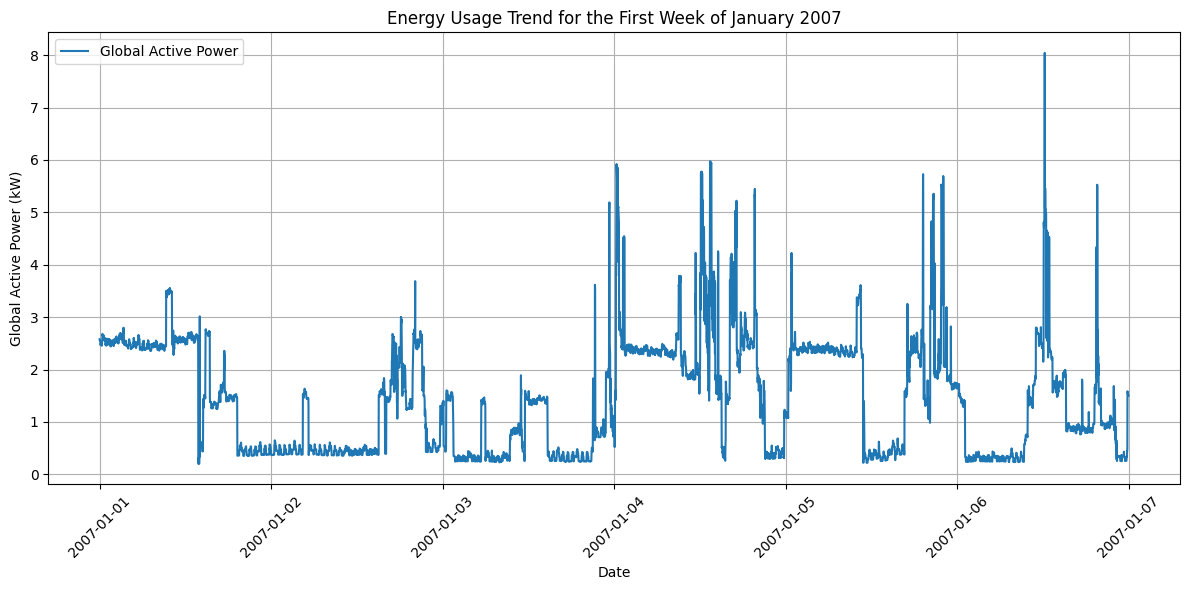

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame (df) with the appropriate data.

# Filter the DataFrame for the first week of January 2007
start_date = '2007-01-01'
end_date = '2007-01-07'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['Global_active_power'], label='Global Active Power')

# Adding titles and labels
plt.title('Energy Usage Trend for the First Week of January 2007')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjusts the padding between subplots for a nicer fit
plt.show()

This code selects data from Jan 1–7, 2007, and plots the Global_active_power over time.


### Q6: Find the average voltage for each day of the first week of February 2007.

**Prompt sent to Groq:**

> I have a pandas DataFrame df with a datetime index and a column Voltage.  
> Write code to find the average voltage for each day of the first week of February 2007.


In [60]:
import pandas as pd
import numpy as np

# Sample DataFrame creation for demonstration
# df = pd.DataFrame({...})

# Ensure the index is a DatetimeIndex
# df.index = pd.to_datetime(df.index)

# Specify the date range for the first week of February 2007
start_date = '2007-02-01'
end_date = '2007-02-07'
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by day and compute the mean voltage
daily_avg_voltage = df['Voltage'].resample('D').mean()

print(daily_avg_voltage)

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    243.530000
Freq: D, Name: Voltage, dtype: float64


This code filters for February 1–7, 2007, and calculates daily average voltage.


### Q7: What is the correlation between global active power and sub-metering values?

**Prompt sent to Groq:**

> I have a pandas DataFrame df with columns: Global_active_power, Sub_metering_1, Sub_metering_2, and Sub_metering_3.  
> Write code to calculate the correlation between global active power and the sub-metering values and plot heat map.


                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.469894        0.452254   
Sub_metering_1                  0.469894        1.000000        0.145944   
Sub_metering_2                  0.452254        0.145944        1.000000   
Sub_metering_3                  0.595260        0.186320        0.144992   

                     Sub_metering_3  
Global_active_power        0.595260  
Sub_metering_1             0.186320  
Sub_metering_2             0.144992  
Sub_metering_3             1.000000  


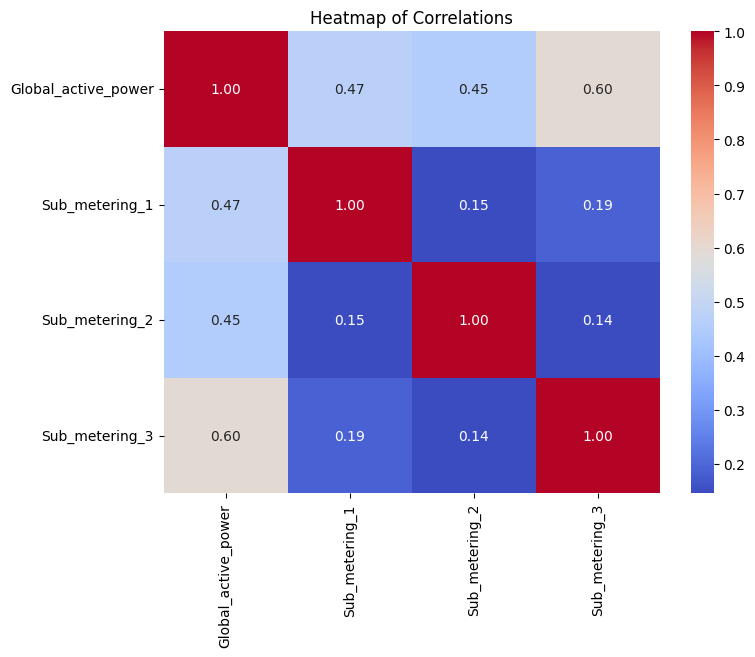

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (you should load your actual DataFrame here)

# Calculate the correlation matrix
correlation_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()

This code calculates and prints the Pearson correlation matrix between Global_active_power and sub-metering columns and plot heat map.
